# Lending Club Case Study
## Authors
### Siddakka Saptasagare
### Kumaraguru Muthuraj

## Business Understanding
**You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:**
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
<p>
<img src ="https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png" alt='Figure 1' style="width:600px;">
<center> <b>Approval - Rejection flow</b> </center> 
 </br>  
</p>

**When a person applies for a loan, there are two types of decisions that could be taken by the company:**

- Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

> Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

> Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

> Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives
**This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.**

**The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.** 

## What are we solving for?
**Lending Club, being headquartered in SFO, CA lends money for cheap interest rates for three major reasons, namely medical, personal and business loans.**

**The history of borrowers between 2007 and 2011 provided will be used to do statistical analysis and provide insights on what parameters of the borrower are related to defaulting. This will help Lending Club avoid lending money to these customers or reduce the loan amount or increase the interest rate.**

## How did we solve?
**We have done extensive EDA on all the parameters in the loan.csv by relating to the meaning in data dictionary. After doing analysis, we have provided multi-perspective analyis and observe the patterns.**

**Once we establish the pattern, we record our conclusion and recommend what LC should do. Every cell(or group of cells) is dedicated to a set of parameters that we analyze. These indicate the factors impacting defaulting nature of customers.**

**We have used different visualizations to perceive the pattern powerfully which leads to decisions.**

## Executive summary of loan and customer parameters that are risk indicators


### Charged-off and paid-off loans
#### Risk 1 - Loan grades E, F and G are higher risk loans. Looks like LC is already charging higher interest rate to recover faster. When LC issues a high loan amount they have to look at other risk factors listed further. A, B, C and D have high risk of defaulting.
#### Risk 2 - Most of the loans above interest rate 15% are at the risk of being charged-off. If interest rate is kept lower in the range of 8 - 11%, the risk of charging-off reduces.
#### Risk 3 - Debt consolidation, credit card, small business, other and home improvement reasons have highest charged off debts. 
#### Risk 4 - Rental and Mortage home dwellers have higher charged-off status than owners. A customer from rental home is risky, followed by mortgagers.
#### Risk 5 - The ratio of bankruptcy counts to none is higher for charged-off customers. If a customer declared bankruptcy before, he is more likely to default.
#### Risk 6 - States grouped based on geography, indicate West region has taken more loans. A loan request from western states is risky, especially California. 


### Charged-off loans by Top 4 - States, months and  purposes.
#### Risk 7 - For either terms, if the interest rate is reduced, defaulting behavior can be reduced.
#### Risk 8 - Giving loan to a customer under the Top 4 criteria with income less than 40K and grade A, B and C is risky. 
#### Risk 9 - Issuing loans in Sep-Dec (specifically Nov and Dec), for the 4 states with debt consolidation as purpose is risky. Customers ask for loan with debt consolidation as a reason in the 4 (especially California) states and default maximum. Towards the end of the year, as celebration begins, customers prepare to take the loan and default.
#### Risk 10 - Lending money to customers fitting top 4 criteria with employment length less than 2 years is risky.
#### Risk 11 - If a customer fitting top 4 criteria in rental home, applies for loan with purpose debt consolidation in the last 4 months, its risky.
#### Risk 12 - When loans are issued without source verification, they are very risky.
#### Risk 13 - Risky to give loans to rental customers with higher DTI.



### The insights are provided step-by-step in the form of a story, to grasp the most important customer parameters impacting loan defaulting tendency. There are 3 major sections:
### A) Cleaning and preparing data.  
### B) Extensive EDA and multi-perspective visualizations with insights and conclusions for the entire year.
### C) Risk analysis with TopN criteria for charged-off loans.

# Section (A) Cleaning and preparing data.  

### Step 1. Load the required libraries, open the loan.csv and cleanup data.

In [1]:
# Loading required python libraries
import math
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings("ignore")

sns.set_style('whitegrid')

In [2]:
#Loading and Extracting the loan zip file
#importing the zipfile library required to extract and read the zip file
#MAKE SURE THE loan.csv and loan.zip are NOT OPEN.
import zipfile as zf
filename= 'loan.zip'
loan = zf.ZipFile(filename,'r')
# extracting the files using 'extracall' method
print(loan.printdir())
loan.extractall()

File Name                                             Modified             Size
loan.csv                                       2017-05-16 14:10:10     34813575
None


In [3]:
#Creating the dataframe by using the csv file present in the zip file
df = pd.read_csv(loan.open('loan.csv'),low_memory=False, parse_dates=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Checking the shape of the dataframe
print(df.shape)

(39717, 111)


In [5]:
#We observed that there are more then 100 columns present in our dataframe
#Lets use set_option to display all the columns of df
pd.set_option('display.max_columns', 200)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
#Lets drop the columns of the df having all NULL or SAME values.
#If half the rows in a column is empty drop the column.
thresh = len(df) * .5 
df.dropna(thresh = thresh, axis = 1, inplace = True)
print(df.shape)
# Lets reset the row index from default to id
df.set_index(['id'], inplace=True)
df.head()

(39717, 54)


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
# Checking the null values of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

##### In the following step, we see that all of the columns have their data filled. But if you look at the values visually, we see that they are repeated to the extent where it doesn't give any perspective. Drop these columns! 

In [8]:
#print(df['pymnt_plan'].value_counts())
#print(df['url'].value_counts())

#CAN do mining on 'desc' text, but the reasons are already condensed in the 'purpose' column.
#print(df['desc'].value_counts())
#print(df['initial_list_status'].value_counts())
#print(df['collections_12_mths_ex_med'].value_counts())
#print(df['policy_code'].value_counts())
#print(df['application_type'].value_counts())
#print(df['acc_now_delinq'].value_counts())
#print(df['delinq_amnt'].value_counts())
#print(df['tax_liens'].value_counts())

### We were recommended by stake holders to remove charged-off loan records and the columns related to customer information - after loan is issued in Part 2. Part 1 has columns for which the values are either 0 or same.

In [9]:
#Part 1
#Let's drop the irrelevent columns to get proper and structured data frame for analysis
#We are dropping the columns because the values of the column or either "0" or same
df.drop(['pymnt_plan','url','desc','initial_list_status','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], inplace=True, axis=1)

#Part 2 - Stake holders asked us to remove these columns because these are filled in after the loan is issued.
df.drop(['inq_last_6mths', 'delinq_2yrs', 'open_acc', 'earliest_cr_line', 'total_acc', 'out_prncp', 'pub_rec', 'revol_bal',\
        'out_prncp_inv', 'revol_util', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', \
         'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], \
        inplace=True, axis=1)
print(df.shape)

(39717, 22)


### Standardization and data formating of columns.
- Create dervived variables to extract more insights and check the factors for high risky loans

In [10]:
# Lets replace special character and convert interest rate and revol_util to float
df.int_rate = df['int_rate'].str.strip('%').astype('float').round()
#df.revol_util = df['revol_util'].str.strip('%').astype('float').round()

getTerm = lambda x: x.strip().split(' ')[0]
df['term'] = (df['term'].apply(getTerm)).astype('int')

df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.0
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.0
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0.0


In [11]:
# Lets do the data imputation for emp_title and emp_length columns
#Fill the values with mode of the data, as it makes more sense to do this.
df.emp_title = df.emp_title.fillna(df.emp_title.mode()[0])
df.emp_length = df.emp_length.fillna(df.emp_length.mode()[0])
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies
id,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0.0
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0.0
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0.0
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0.0
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0.0


In [12]:
#We need dates so that we can do some arithmetic later.
def getDate(x):
    x = str(x).strip()
    ret = datetime(1900, 1, 1).date()
    if not x:
        return ret
    elif x.upper() == str(float('nan')).upper():
        return ret
    else:    
        ret = datetime.strptime(str(x), '%b-%y').date()
    return ret

df['issue_d'] = df['issue_d'].apply(getDate)
df['issue_year'] = df['issue_d'].apply(lambda x: str(x.year))
df['issue_month'] = df['issue_d'].apply(lambda x: x.strftime('%b').upper())

#print (df[['issue_d_tmp', 'issue_year', 'issue_month']])

#def MMM_YY_2_Date(x):
#    y = datetime.strptime(x, '%b-%y')
#    _2019Date = datetime(2019, 1, 1)
#    if y > _2019Date:
#        y = y - relativedelta(years = 100)
#    return y.date()

#df['earliest_cr_line'] = df['earliest_cr_line'].apply(MMM_YY_2_Date)
#df['earl_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: x.strftime('%b'))
#df['earl_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: str(x.year))

#df['credit_history'] = ((df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'Y')).round()

In [13]:
# Lets standardize the empl_length column
# Less than 1 year be considered 0
def currentEmploymentLength(y):
    if y == None:
        return "invalid"
    y = y.strip()
    if (y.find("< 1") != -1):
        return 0
    result = re.findall("\d+", y)
    if result == None:
        return "invalid"
    return int(result[0])

#Check unique values to know pattern
#print(df.emp_length.value_counts())
df.emp_length = df.emp_length.apply(currentEmploymentLength)
#Validate if the values are as expected
#print(df.emp_length.value_counts())


In [14]:
#df['last_credit_pull_month'] = df.last_credit_pull_d.str.split('-').str[0].str.upper()
#df['last_credit_pull_Year'] = df.last_credit_pull_d.str.split('-').str[1]

#def getLastPaymentDate(x):
#    x = str(x).strip()
#    ret = datetime(1900, 1, 1).date()
#    if not x:
#        return ret
#    elif x.upper() == str(float('nan')).upper():
#        return ret
#    else:    
#        ret = datetime.strptime(str(x), '%b-%y').date()
#    return ret
    
#df['last_pymnt_d'] = df['last_pymnt_d'].apply(getLastPaymentDate)
#df['last_pymnt_d_tmp'].head()

#Can we get the month and year string?
#df['last_pymnt_month'] = df['last_pymnt_d'].apply(lambda x: x.strftime('%b'))
#df['last_pymnt_year'] = df['last_pymnt_d'].apply(lambda x: x.year)

#df[['last_pymnt_d_tmp', 'last_pymnt_month', 'last_pymnt_year']].head()

In [15]:
#Convert to lower case
df['loan_status'] = df['loan_status'].apply(str.lower)
df['verification_status'] = df['verification_status'].apply(str.lower)
df['purpose'] = df['purpose'].apply(str.lower)
df['title'] = df['title'].astype(str).apply(str.lower)

#EMI as a percent of monthly income
df['emi_income_percent'] = (df['installment'] / (df['annual_inc'] /12)) * 100


In [16]:
# Lets check the details of addr_state.
# What if we group states together into regions according to starndard terminology and see if any pattern emerges.
# Pick a simple standard way to group States to Regions.
print(df.addr_state.unique())

# lets create Region column depedning on the state column value
# https://www.ducksters.com/geography/us_states/us_geographical_regions.php
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df['Region']= np.nan

def map_region(state):
    if state in west:
        return 'west'
    elif state in south_west:
        return 'south_west'
    elif state in south_east:
        return 'south_east'
    elif state in mid_west:
        return 'mid_west'
    elif state in north_east:
        return 'north_east'
df['Region'] = df['addr_state'].apply(map_region)
df.head()

['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME']


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,emi_income_percent,Region
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10,RENT,24000.0,verified,2011-12-01,fully paid,credit_card,computer,860xx,AZ,27.65,0.0,2011,DEC,8.143500,south_west
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,0,RENT,30000.0,source verified,2011-12-01,charged off,car,bike,309xx,GA,1.00,0.0,2011,DEC,2.393200,south_east
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10,RENT,12252.0,not verified,2011-12-01,fully paid,small_business,real estate business,606xx,IL,8.72,0.0,2011,DEC,8.259549,mid_west
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,source verified,2011-12-01,fully paid,other,personel,917xx,CA,20.00,0.0,2011,DEC,8.275854,west
1075358,1311748,3000,3000,3000.0,60,13.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,source verified,2011-12-01,current,other,personal,972xx,OR,17.94,0.0,2011,DEC,1.016850,west


#### Analysis of the different loan and consumer attributes

In [17]:
cols = df.columns
for col in cols:
    print(col)

member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
purpose
title
zip_code
addr_state
dti
pub_rec_bankruptcies
issue_year
issue_month
emi_income_percent
Region


# Section (B) Extensive EDA and multi-perspective visualizations with insights and conclusions for the most representative year.

### Step 1. Lets look at the distribution of loan amount, funded amount and interest rates.
#### Objective: What is the shape of the distribution for loan amount, funded amount and interest rates?

#### Observation: From the distribution plots we can conclude that the loan amount applied for, loan amount funded and the interest rate are bell shaped but skewed to the left.

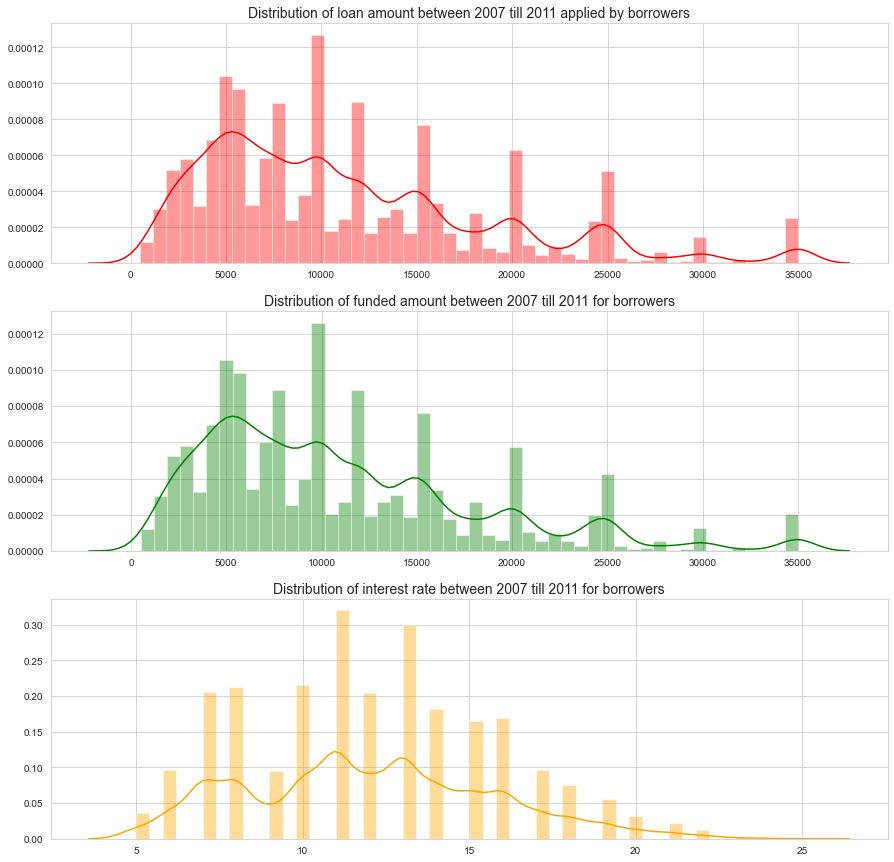

In [18]:
loan_amount = df.loan_amnt.values
funded_amnt = df.funded_amnt.values
Interest_Rate =df.int_rate.values

fig, ax = plt.subplots(3, 1, figsize=(15,15))

# Lets draw the distribution plot for the above subsets
sns.distplot(loan_amount, ax=ax[0], color='red')
sns.distplot(funded_amnt, ax=ax[1], color='green')
sns.distplot(Interest_Rate, ax=ax[2], color='orange')

# Lets set the title for each plots
ax[0].set_title("Distribution of loan amount between 2007 till 2011 applied by borrowers", fontsize=14)
ax[1].set_title("Distribution of funded amount between 2007 till 2011 for borrowers", fontsize=14)
ax[2].set_title("Distribution of interest rate between 2007 till 2011 for borrowers", fontsize=14)
plt.show()

### Step 2. What amount of loan was given each year? How many loans were given each year?
#### Objective: We want to find any patterns of increase in loan counts and amounts between 2007 and 2011

#### Observation: From the bar chart, the mean amount of loan gradually increased from 8KUSD to 12KUSD from 2007 to 2011. Indicates slight growth in business. From the line plot, we see that the number of loans exponentially increased in the same years.

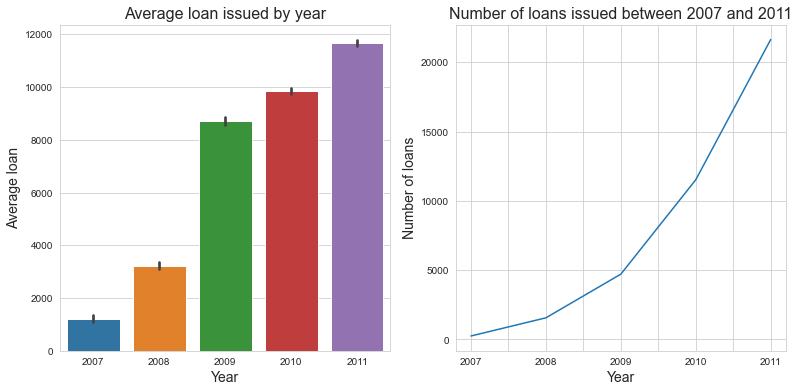

In [19]:
#Lets plot a bar graph to see the average loan amount vs for each Year
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot('issue_year', 'funded_amnt_inv', data=df)
plt.title('Average loan issued by year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan', fontsize=14)

#Lets plot a line chart to see the number of loans for each year
plt.subplot(1,2,2)
g = df.groupby('issue_year')['funded_amnt_inv'].count()
g.plot.line(x_compat=True)
#plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('Number of loans issued between 2007 and 2011', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of loans', fontsize=14)

plt.show()

## Step 3. What percent of loans are fully paid, current and charged-off?

#### Lets see the number of Bad loans in dataset to find out the percentage of risky loans
- **Objective:**  To Check the total and percenatge of loan status from 2007 to 2011.
- **Observation:** The pie-chart is for the entire period from 2007 to 2011. 83% of loans are fully paid, and 2.9% are currently running and about 14.2% are charged off. If we break it year-wise, the loans are current only in the last year. Maximum charge-off happened in 2011.

In [20]:
# Lets check the status of the loans given by Lending club
df["loan_status"].value_counts()

fully paid     32950
charged off     5627
current         1140
Name: loan_status, dtype: int64

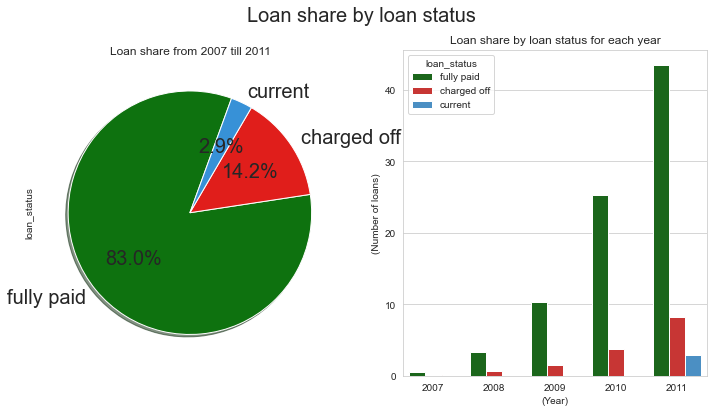

In [21]:
#Plotting Pie chart for loan share by status across all the years
f, ax = plt.subplots(1, 2, figsize=(12, 6))
# Plotting Pie chart
plt.suptitle('Loan share by loan status', fontsize=20)
palette = ["#0E720F","#E01E1B", "#3791D7"]
df["loan_status"].value_counts().plot.pie(ax=ax[0], colors = palette, \
                                          shadow=True,  fontsize=20, startangle=70, autopct='%1.1f%%')
ax[0].set(title = "Loan share from 2007 till 2011")

#Plotting Bar Chart to depict loan share by status for each year
sns.barplot(x="issue_year", y="funded_amnt_inv", hue="loan_status", \
            data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(Number of loans)")
ax[1].set(xlabel="(Year)")
ax[1].set(title="Loan share by loan status for each year")
plt.show()

## Step 4. Are we going to do analysis for the entire population or filtering out? 
- We will remove all the current loan records as its of no value add to the analysis. After filtering out current loans, another way is to pick top 3 - 4 loans in each category, say top 4 months, 4 states and 4 reasons. We have analysed data for entire dataset and with topN approach. 

- In this Section (B) we will look at the entire dataframe as a whole and look at the paid-off and charged-off loan status values. The problem is to analyze charged-off loans which we will specifically address in Section (C). Yes, in Section (C), we will look at only charged-off loans with TopN criteria, to see rank ordering and patterns specific to charged-off loans.

fully paid     32950
charged off     5627
Name: loan_status, dtype: int64
0    32950
1     5627
Name: loan_status_n, dtype: int64


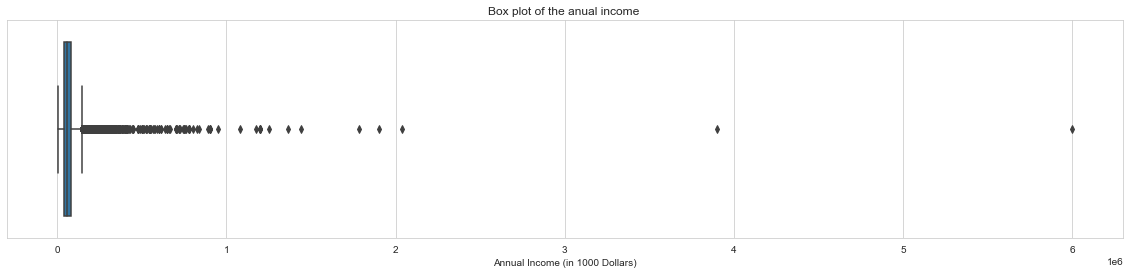

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64
38577
32950
5627


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,emi_income_percent,loan_status_n
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.00000,38577.000000,38577.000000,3.857700e+04,38577.000000,37880.000000,38577.000000,38577.000000
mean,8.422843e+05,11047.025430,10784.058506,10222.481123,41.898437,11.92327,322.466318,5.076445,6.877797e+04,13.272727,0.043479,6.562281,0.145864
std,2.644519e+05,7348.441646,7090.306027,7022.720644,10.333136,3.68394,208.639215,3.602917,6.421868e+04,6.673044,0.204583,4.005438,0.352975
min,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.00000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.028895,0.000000
25%,6.611310e+05,5300.000000,5200.000000,5000.000000,36.000000,9.00000,165.740000,2.000000,4.000000e+04,8.130000,0.000000,3.501634,0.000000
50%,8.392920e+05,9600.000000,9550.000000,8733.440000,36.000000,12.00000,277.860000,4.000000,5.886800e+04,13.370000,0.000000,5.768889,0.000000
75%,1.037336e+06,15000.000000,15000.000000,14000.000000,36.000000,14.00000,425.550000,9.000000,8.200000e+04,18.560000,0.000000,8.814720,0.000000
max,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.00000,1305.190000,10.000000,6.000000e+06,29.990000,2.000000,32.026200,1.000000


In [22]:
#REMOVE CURRENT loans
currentFltr = ~df['loan_status'].isin(["current"])
df = df.loc[currentFltr, :]

#For ease of processing, convert "fully paid" as 0 and "charged off" as 1
#We could use this for correlation
df['loan_status_n'] = df['loan_status'].apply(lambda x: 0 if x == 'fully paid' else 1)

df.head()
print (df['loan_status'].value_counts())
print (df['loan_status_n'].value_counts())

#Box plot the annual_income to get the quantile values to bin the income
plt.figure(figsize=(20,4))
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income (in 1000 Dollars)')
plt.title('Box plot of the anual income ')
plt.show()


#Categorize the income based on the quantiles
print(df['annual_inc'].describe())
# we will use the 25, 50 and 75 quantiles to seggregate the income
# x < 40000 --> 0
# 40000 <= x < 50000 --> 1
# 50000 <= x < 58000 --> 2
# 58000 <= x < 70000 --> 3
# 70000 <= x < 85000 --> 4
# 85000 <= x --> 5
def categorizeIncome(x):
    if x < 40000:
        return "0, a_Less than 40K"
    elif 40000 <= x < 50000:
        return "1, b_40K to 50K"
    elif 50000 <= x < 58000:
        return "2, c_50K to 58K"
    elif 58000 <= x < 70000:
        return "3, d_58K to 70K"
    elif 70000 <= x < 85000:
        return "4, e_70K to 85K"
    else:
        return "5, f_Above 85K"

print(len(df['annual_inc']))
df['inc_cat'] = df['annual_inc'].apply(categorizeIncome)
df['inc_cat'].value_counts()

#Get the 2 values, one for ease of processing, other for display ordering
df[['income_category_n','income_category']] = df.inc_cat.str.split(",", expand=True)
df['income_category'].value_counts()

# Lets check the status of the loans given by Lending club
#Create some filters 
paidOff = df['loan_status'] == 'fully paid'
chargedOff = df['loan_status'] == 'charged off'

dfPaidOff = df.loc[paidOff]
dfChargedOff = df.loc[chargedOff]

print (dfPaidOff['loan_status'].size)
print (dfChargedOff['loan_status'].size)

df.describe()


## Step 5. What does grade mean? Does it have any relationship to loan amount?

- **Objective:** What do grades mean? Does defaulting happen based on these?
- **Observation:** The 3 plots below show that loan grades E, F and G have higher median amounts and are charged higher interest rates as they are high value and risky. The defaulting frequency is high in A, B, C and D grades.
- **Conclusion:** When LC issues a high loan amount they have to look at other risk factors discussed further. Loan grades A, B, C and D needs to be analyzed further for risk as they have highest charged-off numbers.

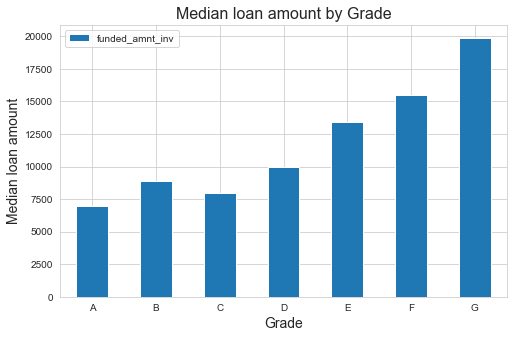

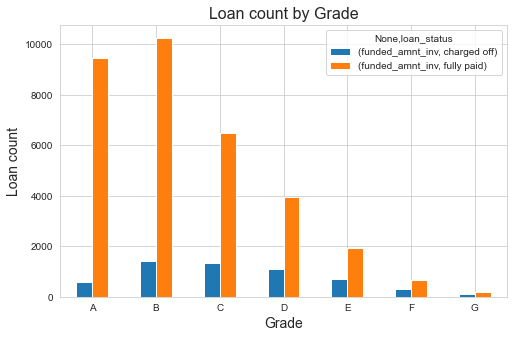

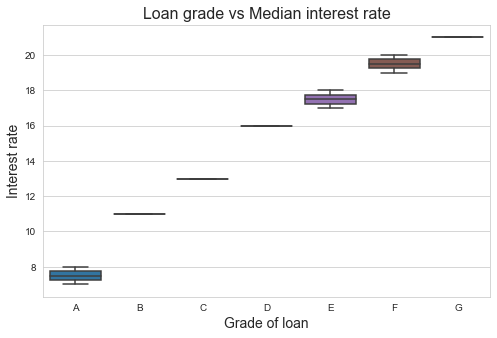

In [23]:
pt = pd.pivot_table(data=df, values=['funded_amnt_inv'], index=['grade'], aggfunc=np.median)
pt.plot(kind="bar", figsize=[8,5])
plt.title('Median loan amount by Grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Median loan amount', fontsize=14)
plt.xticks(rotation=360)
plt.show()

pt = pd.pivot_table(data=df, values=['funded_amnt_inv'], index=['grade'], columns=['loan_status'], aggfunc="count")
pt.plot(kind="bar", figsize=[8,5])
plt.title('Loan count by Grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Loan count', fontsize=14)
plt.xticks(rotation=360)
plt.show()

df_grade= df.groupby(['grade','loan_status'])['int_rate'].median().reset_index().sort_values('int_rate', ascending =True)
df_grade.head()
# Lets see the relation of loan grade and the interest rate
plt.figure(figsize=(8,5))
sns.boxplot(y='int_rate', x='grade', data=df_grade)
plt.ylabel('Interest rate', fontsize=14)
plt.xlabel('Grade of loan', fontsize=14)
plt.title('Loan grade vs Median interest rate', fontsize=16)
plt.xticks(rotation=360)
plt.show()

## Step 6. Is interest rate impacting charged-off status? 

- **Objective:** Does interest rate and charged-off status have any relationship?
- **Observation:** The boxplots show that when representative interest rate is 14% or more, they have higher chance of being charged-off. 
- **Conclusion:**  Most of the loans above interest rate 14% are at the risk of being charged-off. If interest rate is kept lower in the range of 8 - 11%, the risk of charging-off reduces. 

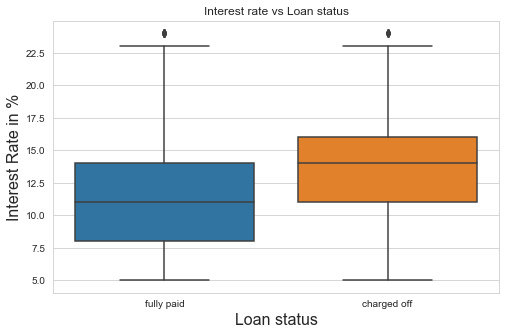

In [24]:
# Lets see the relationship between interest rate and loan status
plt.figure(figsize=(8,5))
sns.boxplot(y='int_rate', x='loan_status', data=df)
plt.ylabel('Interest Rate in %', fontsize=16)
plt.xlabel('Loan status', fontsize=16)
plt.title('Interest rate vs Loan status')
plt.show()

## Step 7. How is the income spread? How is the loan amount spread? Purpose of loan? Is home ownership having any influence? Anything to do with bankruptcy counts? Will it help group states in to regions?

#### Objective: Understand if any other factors have any influence of charged-off status.
#### Observation:  Most of the loans are spread between 5K to 15K. Most of the borrowers have income between 4K to 83K.
### Conclusion: Many conclusions from this step. 
- #### Looks like charged-off loans are from a slightly higher loan amount in the order of 12K and higher, but not a strong pattern indicating risk.
- #### Debt consolidation, credit card, small business, other and home improvement reasons have highest charged off debts. Risky purposes.
- #### Rental and Mortage home dwellers have higher charged-off status than owners. 
- #### The ratio of bankruptcy counts to none is higher for charged-off customers. If a person has gone banckrupt in the past, its most likely that he would default.
- #### States grouped based on geography, indicate West region has taken more loans. 

In [25]:
#Calculate loan_result as a percentage of amount recovered. This will be more than 100 for fully paid and 
#less than 100 for charged-off loans
#df['loan_result']= (df['total_pymnt']-df['funded_amnt'])*100 / df['funded_amnt']

#Loan to income Ratio
df['loan_to_inc_ratio'] = df.funded_amnt_inv*100 / df.annual_inc

# Annual income in thousand Dollars
#df['annual_inc'] = df['annual_inc']/1000
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,emi_income_percent,Region,loan_status_n,inc_cat,income_category_n,income_category,loan_to_inc_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36,11.0,162.87,B,B2,US Army,10,RENT,24000.0,verified,2011-12-01,fully paid,credit_card,computer,860xx,AZ,27.65,0.0,2011,DEC,8.143500,south_west,0,"0, a_Less than 40K",0,a_Less than 40K,20.729167
1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,0,RENT,30000.0,source verified,2011-12-01,charged off,car,bike,309xx,GA,1.00,0.0,2011,DEC,2.393200,south_east,1,"0, a_Less than 40K",0,a_Less than 40K,8.333333
1077175,1313524,2400,2400,2400.0,36,16.0,84.33,C,C5,US Army,10,RENT,12252.0,not verified,2011-12-01,fully paid,small_business,real estate business,606xx,IL,8.72,0.0,2011,DEC,8.259549,mid_west,0,"0, a_Less than 40K",0,a_Less than 40K,19.588639
1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,source verified,2011-12-01,fully paid,other,personel,917xx,CA,20.00,0.0,2011,DEC,8.275854,west,0,"1, b_40K to 50K",1,b_40K to 50K,20.325203
1075269,1311441,5000,5000,5000.0,36,8.0,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,source verified,2011-12-01,fully paid,wedding,my wedding loan i promise to pay back,852xx,AZ,11.20,0.0,2011,DEC,5.215333,south_west,0,"0, a_Less than 40K",0,a_Less than 40K,13.888889


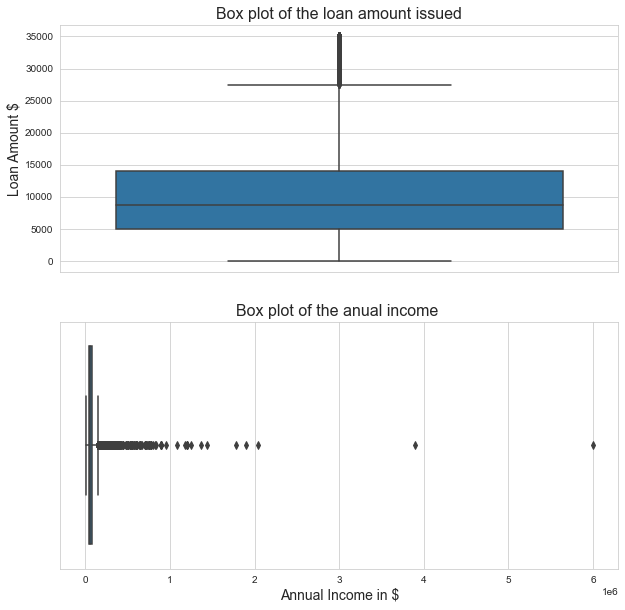

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.boxplot( y=df["funded_amnt_inv"] )
plt.ylabel('Loan Amount $', fontsize=14)
plt.title('Box plot of the loan amount issued', fontsize=16)

plt.subplot(2,1,2)
sns.boxplot( x=df["annual_inc"] )
plt.xlabel('Annual Income in $', fontsize=14)
plt.title('Box plot of the anual income ', fontsize=16)
plt.show()

df['annual_inc'].describe()

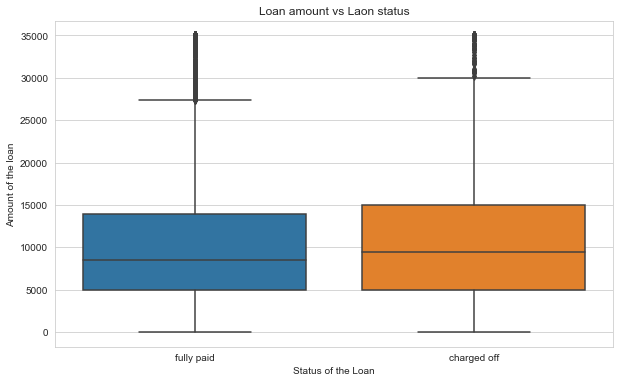

In [27]:
# Lets see if there is any relationship between the loan amount funded and the loan status
plt.figure(figsize=(10,6))
sns.boxplot( y="funded_amnt_inv", x='loan_status' , data=df)
plt.ylabel('Amount of the loan')
plt.xlabel('Status of the Loan')
plt.title( 'Loan amount vs Laon status')
plt.show()

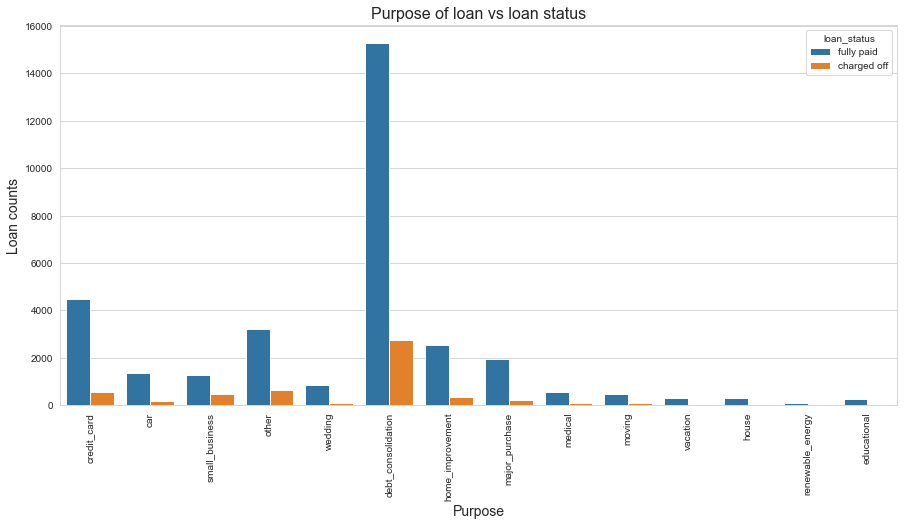

In [28]:
# Lets check the details of loan purpose
df.purpose.unique()

# Lets draw a graph to show the loan status vs purpose
plt.figure(figsize=(15,7))
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.title("Purpose of loan vs loan status", fontsize=16)
plt.xlabel('Purpose', fontsize=14)
plt.ylabel('Loan counts', fontsize=14)
plt.xticks(rotation=90)
plt.show()

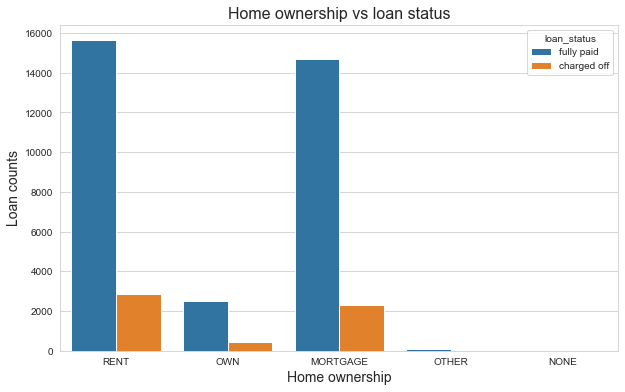

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.ylabel('Loan counts')
plt.title("Home ownership vs loan status", fontsize=16)
plt.xlabel("Home ownership", fontsize=14)
plt.ylabel("Loan counts", fontsize=14)
plt.show()

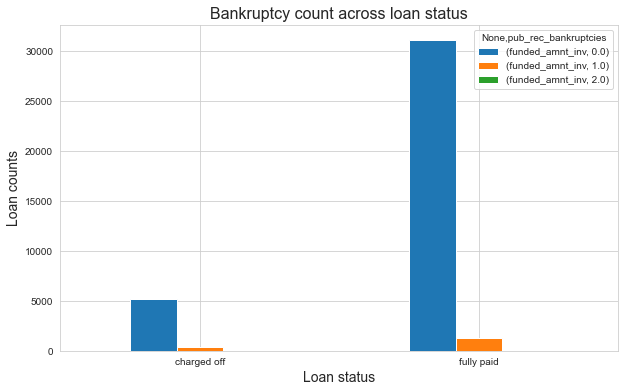

In [30]:
pt = pd.pivot_table(data=df, columns=['pub_rec_bankruptcies'], values=['funded_amnt_inv'], index=['loan_status'], aggfunc="count")
pt.plot(kind="bar", figsize=[10,6])
plt.title("Bankruptcy count across loan status", fontsize = 16) 
plt.xlabel("Loan status", fontsize=14)
plt.ylabel("Loan counts", fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [31]:
# Lets create a loan_group df to see the insights
Loan_group = df.groupby(['issue_month','Region'], as_index=False).sum()
#Scale down by 1000 Dollars
Loan_group.funded_amnt_inv = Loan_group.funded_amnt_inv / 1000
Loan_group.head()

,issue_month,Region,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,pub_rec_bankruptcies,emi_income_percent,loan_status_n,loan_to_inc_ratio
0,APR,mid_west,327928511,4424900,4364750,4109.709680,18240,5069.0,129215.25,2318,26560950.93,5926.04,31.0,2896.251398,68,7629.366587
1,APR,north_east,560553281,8264250,8152250,7712.995964,30396,8813.0,249523.74,3521,49982593.72,9736.89,27.0,5072.519960,76,13072.387599
2,APR,south_east,469936600,6528350,6394150,5984.262755,25680,7136.0,187873.36,3126,39397451.56,8327.08,24.0,3995.933880,80,10453.302846
3,APR,south_west,225558045,3237000,3174400,2969.410458,12504,3523.0,94785.41,1426,21084678.00,4015.69,18.0,1911.515971,34,4910.880055
4,APR,west,554034565,7924550,7771350,7374.554766,29784,8620.0,236822.80,3599,49145143.70,9300.49,40.0,4806.759859,112,12442.470612


In [32]:
# lets plot the graph to see correlation
df_dates = pd.DataFrame(data=Loan_group[['issue_month','Region','funded_amnt_inv']])
by_issued_amount = df_dates.groupby(['issue_month', 'Region']).funded_amnt_inv.sum()
by_issued_amount.head()

issue_month  Region    
APR          mid_west      4109.709680
             north_east    7712.995964
             south_east    5984.262755
             south_west    2969.410458
             west          7374.554766
Name: funded_amnt_inv, dtype: float64

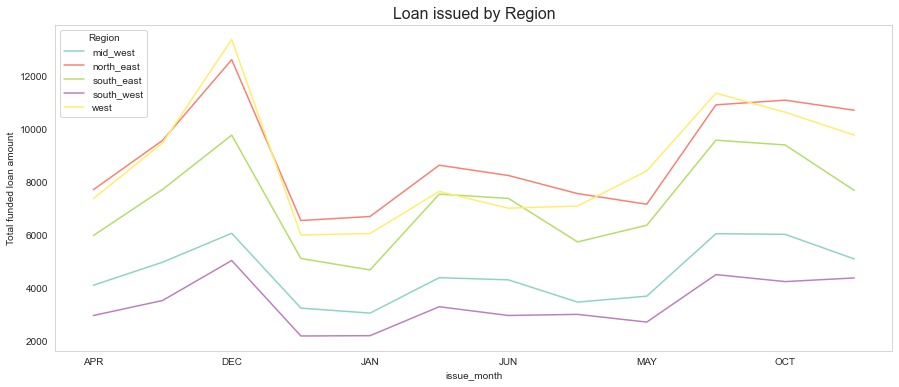

In [33]:
# lets plot the graph to see correlation
#plt.style.use("grayscale")
cmap = plt.cm.Set3
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True,figsize=(15,6))
plt.ylabel('Total funded loan amount')
plt.title('Loan issued by Region', fontsize=16)
plt.show()

## Step 8. Will it help group states in to regions? Lets look at mean interest rates, employee length, debt-to-income ratio and annual income across the regions for anything abnormal.

#### Objective: Understand if any pattern emerges across regions.
### Observation:  

- #### Average interest rate, employment length, DTI and Annual income across different regions for each month are showing some pattens but are NOT strong. We have to use States individually to see patterns. 
- #### Customers with lowest average annual income have taken loans in December.
- #### Average employment length of Customers is lowest in January.
- #### Across regions, Jan had lowest interet rate and Dec had highest.
- #### Customers who took loans in December seem to have the highest DTI.
- #### West, north-east, south-east have the highest default loans.
- #### Small business, debt consolidation, credit card, major purchase seem to be the top reasons for charged-off loans with high loan/income ratio.
- #### For mid-west region, the loan/income ratio is highest and in general this ratio is high for charged-off customers.
- #### Income group <40K defaults the most. This is a risk item.
- #### Though there are positive and negative correlations, these don't relate to charged-off status.
- #### LC is already charging higher interest rates for higher salaried customers.
- #### Debt/Income ratio is lower as income increases. 50-58K group has the highest and lowest in >85K.

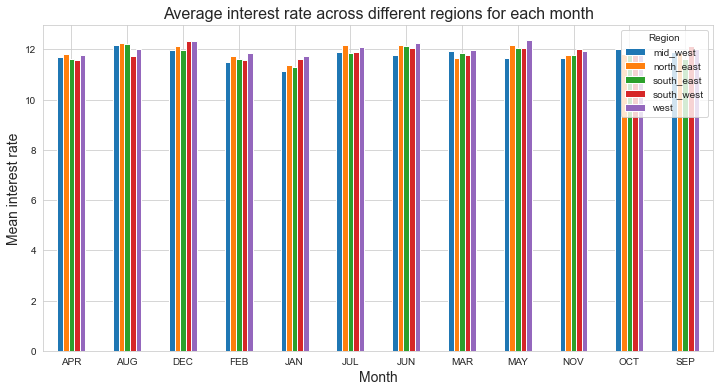

In [34]:
# lets draw the plot
sns.set_style('whitegrid')
by_int_rate = df.groupby(['issue_month', 'Region']).int_rate.mean()
by_int_rate.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average interest rate across different regions for each month', fontsize=16)
plt.ylabel('Mean interest rate', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=0)
plt.show()

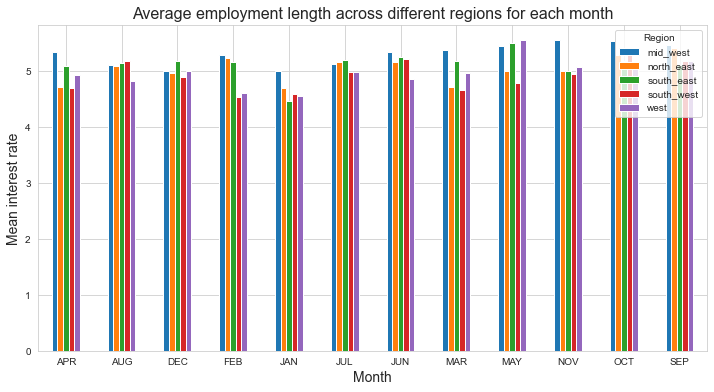

In [35]:
sns.set_style('whitegrid')
by_emp_length = df.groupby(['issue_month', 'Region']).emp_length.mean()
by_emp_length.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average employment length across different regions for each month', fontsize=16)
plt.ylabel('Mean interest rate', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=0)
plt.show()

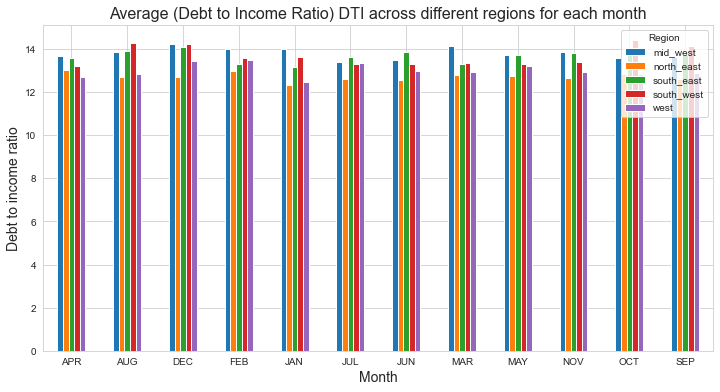

In [36]:
sns.set_style('whitegrid')
by_dti = df.groupby(['issue_month', 'Region']).dti.mean()
by_dti.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average (Debt to Income Ratio) DTI across different regions for each month', fontsize=16)
plt.ylabel('Debt to income ratio', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=0)
plt.show()

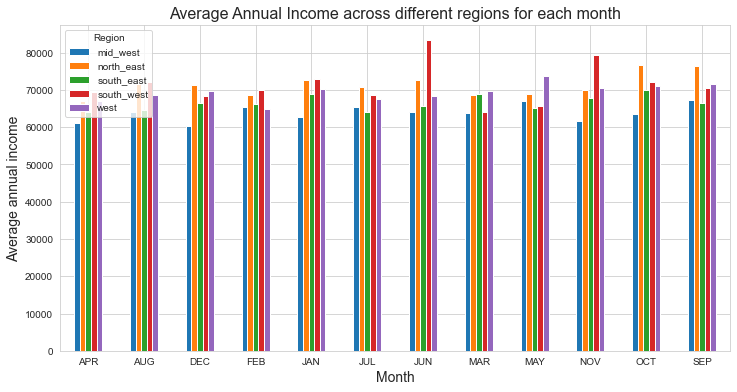

In [37]:
sns.set_style('whitegrid')
by_income = df.groupby(['issue_month', 'Region']).annual_inc.mean()
by_income.unstack().plot(kind='bar', stacked=False, grid=True, legend=True,figsize=(12,6))
plt.title('Average Annual Income across different regions for each month', fontsize=16)
plt.ylabel('Average annual income', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=0)
plt.show()

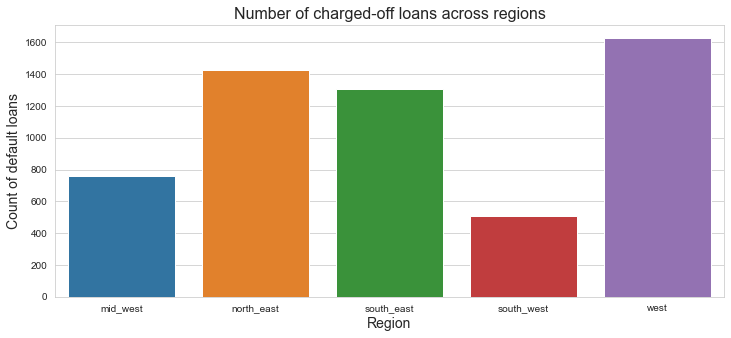

In [38]:
#Lets check the region wise loan status
plt.figure(figsize=(12,5))
g = df[df['loan_status'] == 'charged off'].groupby('Region')['loan_status'].count().reset_index()
sns.barplot(x='Region', y='loan_status', data=g)
plt.ylabel('Count of default loans', fontsize=14)
plt.xlabel('Region', fontsize=14)
plt.title('Number of charged-off loans across regions', fontsize=16)
plt.show()

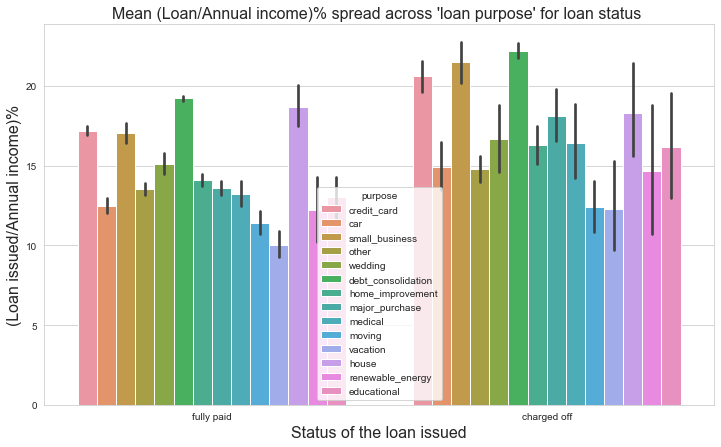

In [39]:
#Lets check the relationship between loan to income ratio vs loan status for different purposes
plt.figure(figsize=(12,7))
sns.barplot(x='loan_status', y='loan_to_inc_ratio', hue='purpose', data=df)
plt.xlabel('Status of the loan issued', fontsize="16")
plt.ylabel('(Loan issued/Annual income)%', fontsize="16")
plt.title('Mean (Loan/Annual income)% spread across \'loan purpose\' for loan status ', fontsize=16)
plt.show()

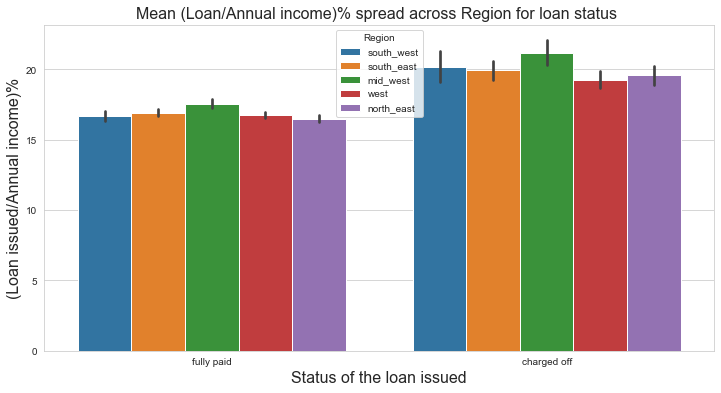

In [40]:
#Lets check the relation between loan to income ratio vs loan status for different Region
plt.figure(figsize=(12,6))
sns.barplot(x='loan_status',y='loan_to_inc_ratio',hue='Region',data=df)
plt.xlabel('Status of the loan issued', fontsize="16")
plt.ylabel('(Loan issued/Annual income)%', fontsize="16")
plt.title('Mean (Loan/Annual income)% spread across Region for loan status ', fontsize=16)
plt.show()

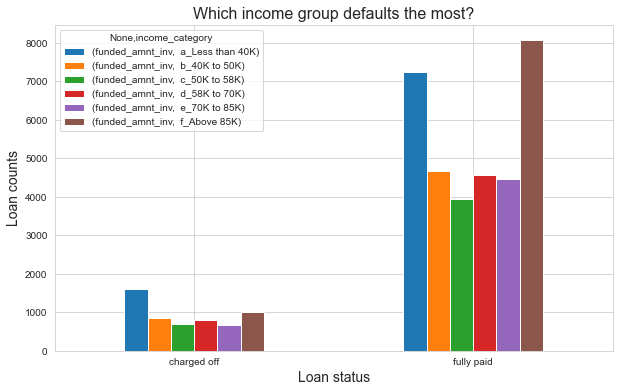

In [41]:
#Lets analyze which income group defaults the most? Looks like income group <40K defaults the most.
pt = pd.pivot_table(data=df, values=['funded_amnt_inv'], index=['loan_status'], \
                    columns = ['income_category'], aggfunc="count")
pt.plot(kind="bar", figsize=[10,6])
plt.title('Which income group defaults the most?', fontsize=16)
plt.xlabel('Loan status', fontsize=14)
plt.ylabel('Loan counts', fontsize=14)
plt.xticks(rotation=0)
plt.show()

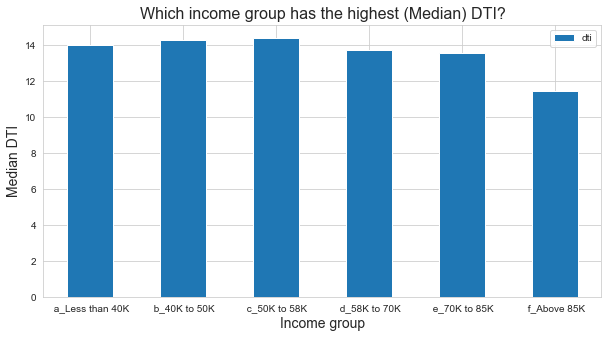

In [42]:
#Lets analyze which income group defaults the most? Looks like income group <40K defaults the most.
pt = pd.pivot_table(data=df, values=['dti'], index=['income_category'], \
                     aggfunc=np.median)
pt.plot(kind="bar", figsize=[10,5])
plt.title('Which income group has the highest (Median) DTI?', fontsize=16)
plt.xlabel('Income group', fontsize=14)
plt.ylabel('Median DTI', fontsize=14)
plt.xticks(rotation=0)
plt.show()

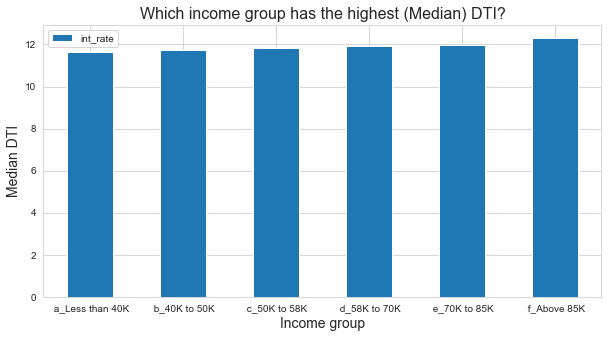

In [43]:
#Lets analyze which income group defaults the most? Looks like income group <40K defaults the most.
pt = pd.pivot_table(data=df, values=['int_rate'], index=['income_category'], \
                     aggfunc=np.mean)
pt.plot(kind="bar", figsize=[10,5])
plt.title('Which income group has the highest (Median) DTI?', fontsize=16)
plt.xlabel('Income group', fontsize=14)
plt.ylabel('Median DTI', fontsize=14)
plt.xticks(rotation=0)
plt.show()

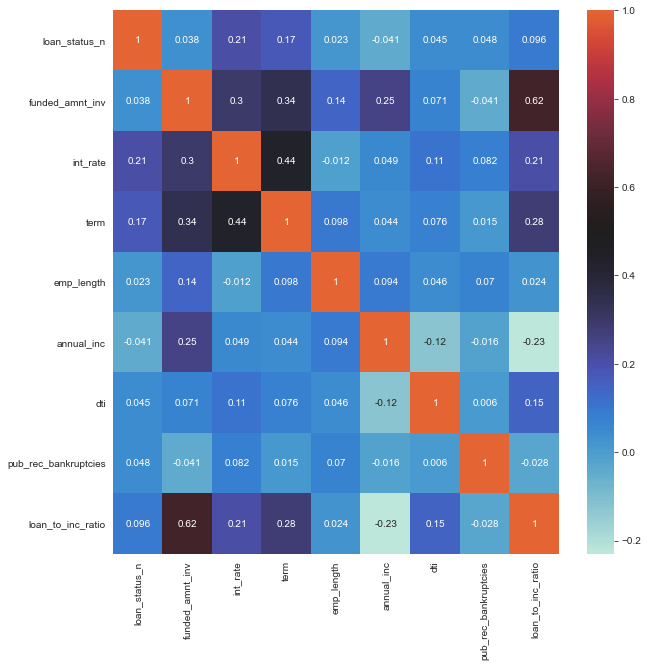

In [44]:
plt.figure(figsize=(10,10))
cont_var= ['loan_status_n', 'funded_amnt_inv', 'int_rate', 'term', 'emp_length', 'annual_inc', 'dti', \
          'pub_rec_bankruptcies', 'loan_to_inc_ratio', 'income_category']   
corr = df[cont_var].corr()
sns.heatmap(corr, annot=True, center=0.5)
plt.show()

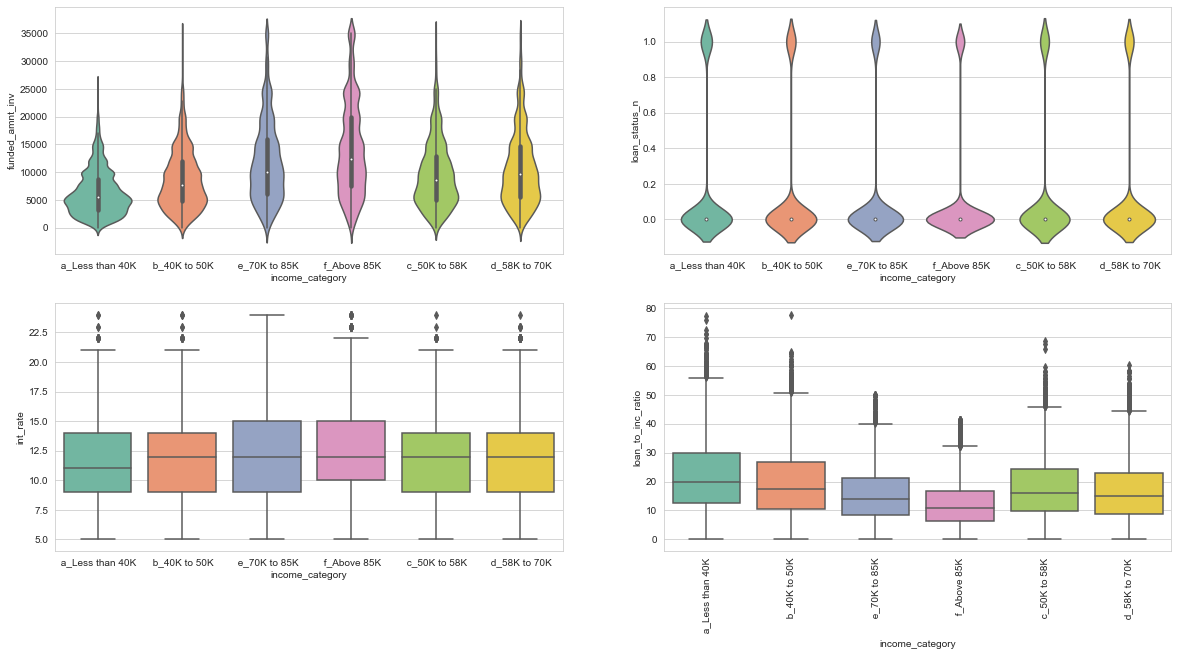

In [45]:
# Plot of income category vs different variables
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(20,10))

# Plot of income category vs loan amount
sns.violinplot(x="income_category", y="funded_amnt_inv", data=df, palette="Set2", ax=ax1 )
plt.xticks(rotation=90)
# Plot of income category vs loan status
sns.violinplot(x="income_category", y="loan_status_n", data=df, palette="Set2", ax=ax2)
plt.xticks(rotation=90)
# Plot of income category vs interest rate
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax3)
plt.xticks(rotation=90)
# Plot of income category vs loan/income ratio
sns.boxplot(x="income_category", y="loan_to_inc_ratio", data=df, palette="Set2", ax=ax4)
plt.xticks(rotation=90)
plt.show()

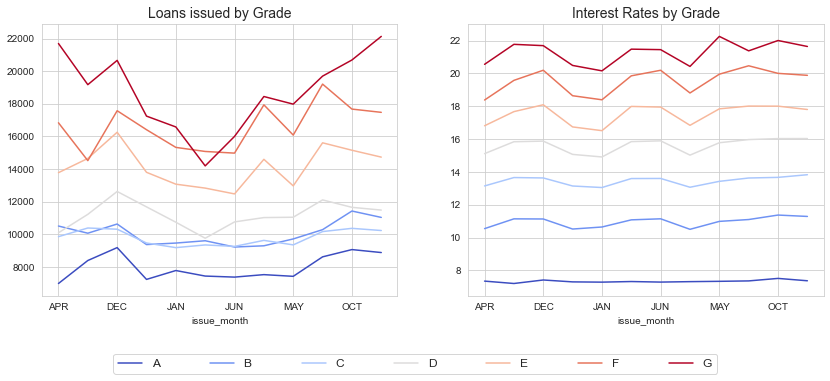

In [46]:
# Let's Plot how many loans were issued by grade
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['issue_month', 'grade']).funded_amnt_inv.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 5), colormap=cmap)
ax1.set_title('Loans issued by Grade', fontsize=14)
    
    
by_inc = df.groupby(['issue_month', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 5), colormap=cmap)
ax2.set_title('Interest Rates by Grade', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12}, ncol=7, mode="expand", borderaxespad=0.)
plt.show()


# Section (C) Risk analysis with TopN criteria for charged-off loans.
### Now that we have completed analysis and concluded on the entire dataset, we will move on to charged-off loans between 2007 and 2011. If we identify a pattern across the TopN criteria, we will be able to solve for the entire population.

In [47]:
def printHistogram(desc, series):
    print(desc.upper())
    print(series.describe())
    plt.hist(series)
    plt.show()
    return

## Step 1. Does charged-off loans get influenced by term and interest rates?

#### Objective: Identify the influence of terms and interest rates.
#### Observation:  For those with 36 months term, approx 1900 of them dropped out when interest rate was 11 - 15 percent. From 60 months term, about 900 of them dropped out when interest rate was 15 - 17 percent. Observe that the defaulter count is low for 36 months as interest rate increases. 
### Conclusion: For either terms, if the interest rate is reduced, defaulting behavior can be reduced.


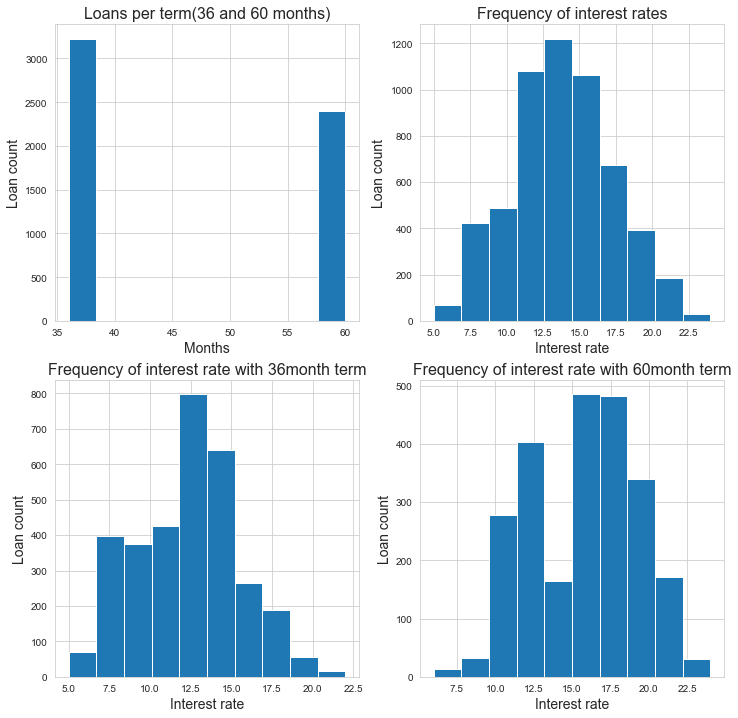

In [48]:
#dfChargedOff is the dataframe with charged-off loans between 2007 and 2011
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.hist(dfChargedOff['term'])
plt.title('Loans per term(36 and 60 months)', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(2,2,2)
plt.hist(dfChargedOff['int_rate'])
plt.title('Frequency of interest rates', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

_36monthChargedOff = dfChargedOff[dfChargedOff['term'] == 36]
_60monthChargedOff = dfChargedOff[dfChargedOff['term'] == 60]

plt.subplot(2,2,3)
plt.hist(_36monthChargedOff['int_rate'])
plt.title('Frequency of interest rate with 36month term', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(2,2,4)
plt.hist(_60monthChargedOff['int_rate'])
plt.title('Frequency of interest rate with 60month term', fontsize=16)
plt.xlabel('Interest rate', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.show()

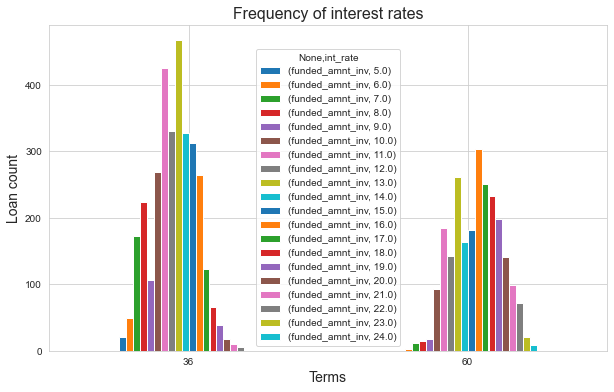

In [49]:
pt = pd.pivot_table(data=dfChargedOff, values=['funded_amnt_inv'], index=['term'], columns = ['int_rate'], aggfunc='count')
pt.plot(kind="bar", figsize=[10,6])
plt.title('Frequency of interest rates', fontsize=16)
plt.xlabel('Terms', fontsize=14)
plt.ylabel('Loan count', fontsize=14)
plt.xticks(rotation=0)
plt.show()

## Step 2. We want to find the reason for charged-off loans. What are the top 4 - states, purposes and months of the year, for which charged-off numbers are high?

#### Objective: Identify top 4 states, purposes and months where charge-off is high.
#### Observation:  The top 4 states are 'CA', 'FL', 'NY', 'TX'. Top 4 purpose for which loan is issued are 'debt_consolidation', 'other', 'credit_card', 'small_business'. Top 4 months when loan issued are defaulted - 'DEC', 'NOV', 'OCT', 'SEP'. Note that these States are responsible for high default rate conciding with the corresponding Region in the previous Section.
### Conclusion: In the above mentioned 4 months (specifically Nov and Dec), customers ask for loan with debt consolidation as a reason in the 4 (especially California) states and default maximum. Towards the end of the year, as celebration begins, customers prepare to take the loan and default.

In [50]:
#Bar plotting loan counts across issue month, states and purpose was too distracting.
#We will restrict it to TOP 4 months, states and purpose
print("***********Top 4 months, states and purpose************")
print("*******************************************************")
print(dfChargedOff['issue_month'].value_counts()[:4])
print(dfChargedOff['purpose'].value_counts()[:4])
print(dfChargedOff['addr_state'].value_counts()[:4])

top4MONTHS_Filter = dfChargedOff['issue_month'].isin(['DEC', 'NOV', 'OCT', 'SEP'])
top4PURPOSE_Filter = dfChargedOff['purpose'].isin(['debt_consolidation', 'other', 'credit_card', 'small_business'])
top4STATE_Filter = dfChargedOff['addr_state'].isin(['CA', 'FL', 'NY', 'TX'])

top4MONTHS_dfChargedOff = dfChargedOff[top4MONTHS_Filter]
top4STATES_dfChargedOff = dfChargedOff[top4STATE_Filter]
top4PURPOSE_dfChargedOff = dfChargedOff[top4PURPOSE_Filter]


***********Top 4 months, states and purpose************
*******************************************************
DEC    678
NOV    598
OCT    580
SEP    547
Name: issue_month, dtype: int64
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
Name: purpose, dtype: int64
CA    1125
FL     504
NY     495
TX     316
Name: addr_state, dtype: int64


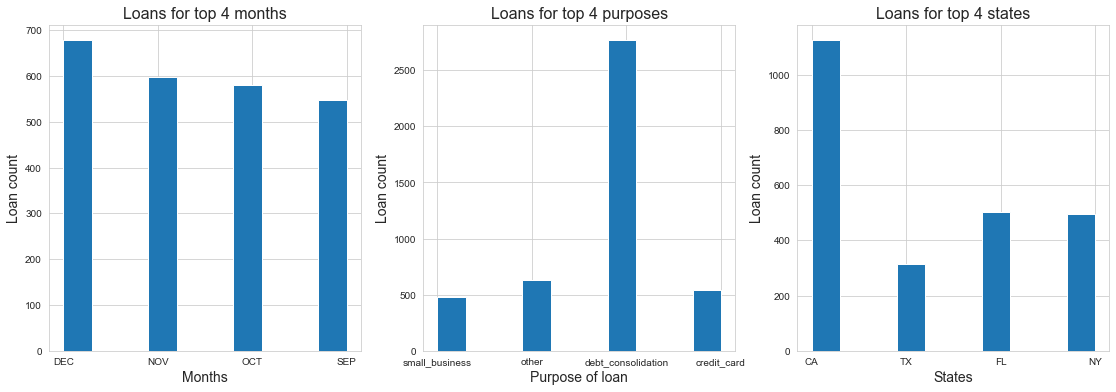

In [51]:
plt.figure(figsize=(19, 6))

plt.subplot(1,3,1)
plt.hist(top4MONTHS_dfChargedOff['issue_month'])
plt.title('Loans for top 4 months', fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(1,3,2)
plt.hist(top4PURPOSE_dfChargedOff['purpose'])
plt.title('Loans for top 4 purposes', fontsize=16)
plt.xlabel('Purpose of loan', fontsize=14)
plt.ylabel('Loan count', fontsize=14)

plt.subplot(1,3,3)
plt.hist(top4STATES_dfChargedOff['addr_state'])
plt.title('Loans for top 4 states', fontsize=16)
plt.xlabel('States', fontsize=14)
plt.ylabel('Loan count', fontsize=14)
plt.show()



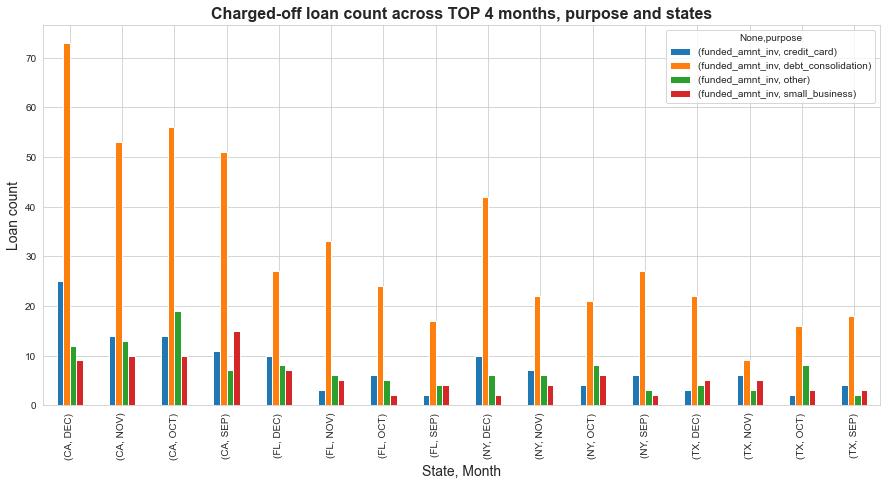

In [52]:
TOP4_dfChargedOff = dfChargedOff[top4MONTHS_Filter & top4PURPOSE_Filter & top4STATE_Filter]
TOP4_dfChargedOff.head()

pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['addr_state', 'issue_month'], columns=['purpose'], \
                    values=['funded_amnt_inv'], aggfunc='count')
pt.plot(kind="bar", figsize=[15,7], fontsize=10)
plt.title("Charged-off loan count across TOP 4 months, purpose and states", fontsize = 16, fontweight ='bold') 
plt.xlabel('State, Month', fontsize=14)
plt.ylabel('Loan count', fontsize=14)
plt.show()


## Step 3. Within the top 4, does grade have any impact to default?

#### Objective: Identify if grade has an impact for top 4 states, months, reasons. 
#### Observation: Loan counts for top 4 months split across grade yields the same result as Step 2. Customers with grade A, B and C loans default the most. Customes whose annual income is less than 40K default the most.
### Conclusion: Giving loan to a customer under the Top 4 criteria with income less than 40K and grade A, B and C is risky.

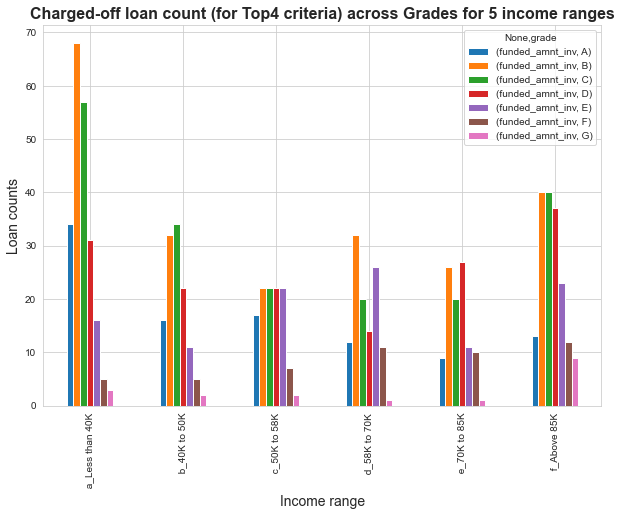

In [53]:
#We have used the 25, 50 and 75 quantiles to seggregate the income

#Lets check if credit history has an impact on top4 (month, state, purpose)
pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['income_category'], columns=['grade'], \
                    values=['funded_amnt_inv'], aggfunc='count')
pt.plot(kind="bar", figsize=[10,7])
plt.xlabel("Income range", fontsize=14)
plt.ylabel("Loan counts", fontsize=14)
plt.title("Charged-off loan count (for Top4 criteria) across Grades for 5 income ranges", fontsize = 16, fontweight ='bold') 
plt.show()

In [54]:
#Create some filters for NOV-DEC, Debt consolidation and California and
#create the new dataframe.
NOVDEC_Filter = dfChargedOff['issue_month'].isin(['DEC', 'NOV'])
DEBT_CONS_Filter = dfChargedOff['purpose'].isin(['debt_consolidation'])
CALIFORNIA_Filter = dfChargedOff['addr_state'].isin(['CA'])

_2Mn_dbt_CA_dfChargedOff = dfChargedOff[NOVDEC_Filter & DEBT_CONS_Filter & CALIFORNIA_Filter]

## Step 4. Within the top 4, does employment length have any influence to default?

#### Objective: Identify if current employment length has an impact for top 4 states, months, reasons. 
#### Observation:  Loan counts for top 4 months split across emp_length yields that employees with less than 2 years of employment length default the most. As the number of years of employment with the current employer increases, the tendency to default reduces steeply.
### Conclusion: Lending money to customers fitting top 4 criteria with employment length less than 2 years is risky.

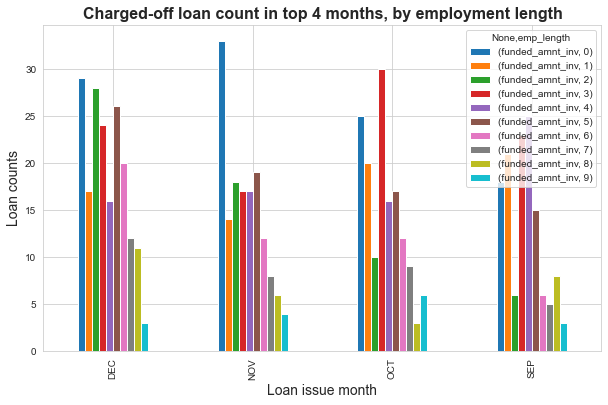

In [55]:
#Remove employment greater than 10 years as it gives a false negative.
EMPLEN_Filter = ~TOP4_dfChargedOff['emp_length'].isin(['10'])
emp_LT10_TOP4_dfChargedOff = TOP4_dfChargedOff[EMPLEN_Filter]

pt = pd.pivot_table(data=emp_LT10_TOP4_dfChargedOff, index=['issue_month'], columns=['emp_length'], \
                    values=['funded_amnt_inv'], aggfunc='count')
pt.plot(kind="bar", figsize=[10,6])
plt.title("Charged-off loan count in top 4 months, by employment length", fontsize = 16, fontweight ='bold') 
plt.xlabel("Loan issue month", fontsize=14)
plt.ylabel("Loan counts", fontsize=14)
plt.show()

## Step 5. Now that we know in last quater, especially December, customers take debt consolidation loan and default. Does home ownership affect defaulting nature?

#### Objective - Analyze if home ownership has any influence on defaulting nature for top4 criteria customers.
#### Observation - Yes, those who rent default significantly higher than mortagers and mortgagers default higher than home owners. 
### Conclusion - If a customer fitting top 4 criteria in rental home, applies for loan with purpose debt consolidation in the last 4 months, its risky.

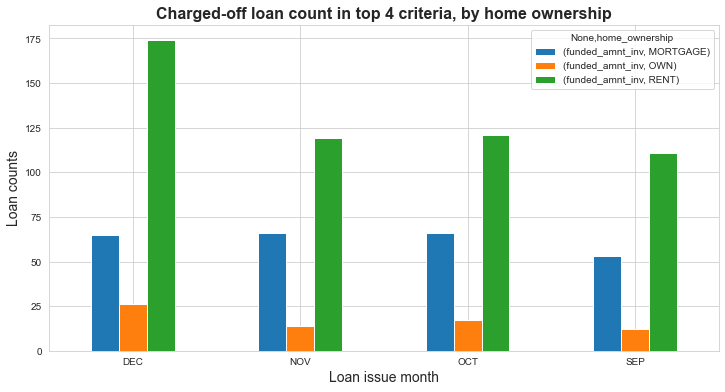

In [56]:
pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['issue_month'], columns=['home_ownership'], \
                    values=['funded_amnt_inv'], aggfunc='count')
pt.plot(kind="bar", figsize=[12,6])
plt.title("Charged-off loan count in top 4 criteria, by home ownership", fontsize = 16, fontweight ='bold')
plt.xlabel("Loan issue month", fontsize=14)
plt.ylabel("Loan counts", fontsize=14)
plt.xticks(rotation=0)
plt.show()

## Step 6. Does verification status impact the top 4 criteria defaulters?

#### Objective - Analyze if verification status has any impact on default tendency.
#### Observation - Loans that are source verified have lesser defaults. Its 1/3rd of total defaults.
### Conclusion - When loans are issued without source verification, they are very risky.

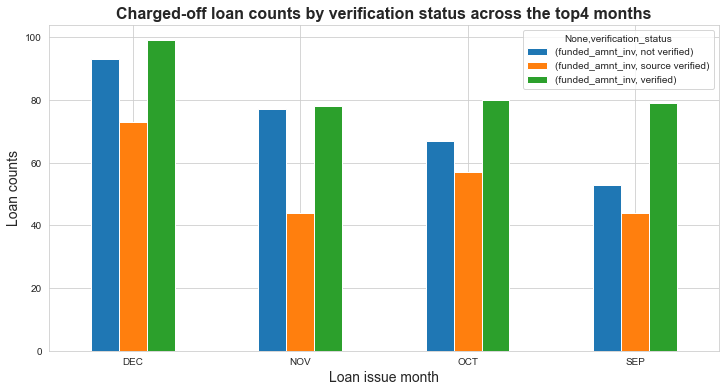

In [57]:
pt = pd.pivot_table(data=TOP4_dfChargedOff, index=['issue_month'], columns=['verification_status'], \
                    values=['funded_amnt_inv'], aggfunc='count')
pt.plot(kind="bar", figsize=[12,6])
plt.title("Charged-off loan counts by verification status across the top4 months", fontsize = 16, fontweight ='bold')
plt.xlabel("Loan issue month", fontsize=14)
plt.ylabel("Loan counts", fontsize=14)
plt.xticks(rotation=0)
plt.show()

## Step 7. What is the impact of DTI on defaulting nature?
#### Objective - In the months Nov, Dec, for the state of California, for those customers who take loan with reason as debt consolidation, we want to know the DTI relationship. 
#### Observation - For rental defaulters, the Median DTI is high and close to home owners. DTI is higer than mortagers, its risky to lend money to rental owners. In many plots earliers, we saw that rental is risky. This reinforces the theory.

### Conclusion - Risky to give loans to rental customers with higher DTI.

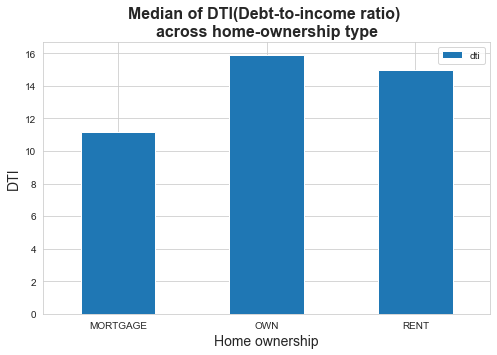

In [58]:
l_EMPLEN_Filter = ~_2Mn_dbt_CA_dfChargedOff['emp_length'].isin(['10'])
dtiAnalysis_df = _2Mn_dbt_CA_dfChargedOff[l_EMPLEN_Filter]

pt = pd.pivot_table(data=dtiAnalysis_df, index=['home_ownership'], values=['dti'], aggfunc=np.median)
pt.plot(kind="bar", figsize=[8,5])
plt.title("Median of DTI(Debt-to-income ratio) \nacross home-ownership type", fontsize = 16, fontweight ='bold')
plt.xlabel('Home ownership', fontsize=14)
plt.ylabel('DTI', fontsize=14)
plt.xticks(rotation=0)
plt.show()

### CONCLUSION
#### Consider LC tightly controls loan applications with the following overlapping conditions:
- Customers with less than 2 years of experience
- Loan grade is A, B or C
- Purpose of loan is debt consolidation, other, credit card, small business
- Rental customers
- Income is less than 58K
#### LC could have converted 2916 charged-off loans worth USD20,038,752 to good loans (of the total 5627 charged-off loans worth USD61,131,728) which is 32%

In [59]:
#Lets see how much LC could have done better with our analysis
#Build the worst case high probability defaulter case
fltr1 = df['emp_length'].isin(['0', '1', '2'])
fltr2 = df['grade'].isin(['A','B','C'])
fltr3 = df['purpose'].isin(['debt_consolidation', 'other', 'credit_card', 'small_business'])
fltr4 = df['home_ownership'].isin(['RENT'])
fltr5 = df['income_category_n'].isin(['0','1', '2'])

highProbDf = df[fltr1 & fltr2 & fltr3 & fltr4 & fltr5]

print("High probability defaulter count - ", len(highProbDf))
print("Charged-off loans count - ", len(dfChargedOff))
print("Fully paid and charged-off loans number - ", len(df))

highProbDf.describe()

highProbDfVal = 2916 * 6872.00 #Count x Mean
dfChargedOffDfVal = 5627 * 10864.00 #Count x Mean

print ("High probabilty defaulter loan value - ", highProbDfVal, \
       "Defaulter loan value - ", dfChargedOffDfVal, \
       "High Probability defaulter loan value / Defaulter loan value - ", (highProbDfVal/dfChargedOffDfVal)*100)


High probability defaulter count -  2916
Charged-off loans count -  5627
Fully paid and charged-off loans number -  38577
High probabilty defaulter loan value -  20038752.0 Defaulter loan value -  61131728.0 High Probability defaulter loan value / Defaulter loan value -  32.77962631777724


### END OF ASSIGNMENT